In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
genomes = pd.read_csv('final_viral_genomes.csv')

In [3]:
genomes.rename(columns = {'Genome': 'Name'}, inplace = True)

In [4]:
genomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9460 entries, 0 to 9459
Data columns (total 17 columns):
Name                  9460 non-null object
Accession             9460 non-null object
Source information    5840 non-null object
Segm                  9460 non-null object
Length                9460 non-null object
Protein               9460 non-null object
Neighbors             9460 non-null object
Host                  9457 non-null object
Created               9460 non-null object
Updated               9460 non-null object
Classification        9460 non-null object
ItemId                9460 non-null object
SequenceType          9397 non-null object
Report                9460 non-null object
Sequence              9460 non-null object
Molecule Type         9460 non-null object
Phylogeny             9460 non-null object
dtypes: object(17)
memory usage: 1.2+ MB


In [5]:
# Clean up the length column and convert the values to ints
genomes['Length'] = genomes['Length'].apply(lambda x: int(x.replace('nt', '').replace('(', '').replace(')','')))

In [6]:
# Clean up the Phylogeny column a little bit
genomes['Phylogeny'] = genomes['Phylogeny'].apply(lambda x: x[9:-1] if x[-1] == ';' else x[9:])
genomes['Phylogeny'] = genomes['Phylogeny'].apply(lambda x: x.split(';')[1:] if len(x.split(';')) > 1 
                                                  else x.split(';'))
genomes['Phylogeny'] = genomes['Phylogeny'].apply(lambda x: ','.join(x))

In [7]:
genomes.tail()

,Name,Accession,Source information,Segm,Length,Protein,Neighbors,Host,Created,Updated,Classification,ItemId,SequenceType,Report,Sequence,Molecule Type,Phylogeny
9455,Wilkie partiti-like virus 1,/nuccore/1211677385,strain:mosWSCP36002,-,2100,1,-,invertebrates,06/27/2017,07/14/2017,unclassified viruses,NC_035122.1,complete genome,LOCUS NC_035122 2100 bp ...,tatactacaatatatacaatatttttcactcataaaatgactgact...,genomic RNA,unclassified viruses
9456,Wilkie partiti-like virus 2,/nuccore/1211677379,strain:mosWSCP53020,-,1819,1,1,eukaryotes,06/27/2017,07/14/2017,unclassified viruses,NC_035119.1,complete genome,LOCUS NC_035119 1819 bp ...,ggcaatatgaattcctatgcacttaacaacattattcgtacttcac...,genomic RNA,unclassified viruses
9457,Wolkberg virus segment 1,/nuccore/1197509331,isolate:2562_SA3,None,4461,proteins: 1,neighbors: 10,invertebrates,05/24/2017,05/24/2017,unclassified viruses,NC_034631.1,complete cds,LOCUS NC_034631 4461 bp ...,agtagtgtactaccaatattctaatattttcaatatatctttacaa...,genomic RNA,unclassified viruses
9458,Wolkberg virus segment 2,/nuccore/1197509335,isolate:2562_SA3,None,6873,proteins: 1,neighbors: 10,invertebrates,05/24/2017,05/24/2017,unclassified viruses,NC_034633.1,complete cds,LOCUS NC_034633 6873 bp ...,agtagtgtactcctatactaacttcacttatcactaaaatggacga...,genomic RNA,unclassified viruses
9459,Wolkberg virus segment 3,/nuccore/1197509333,isolate:2562_SA3,None,978,proteins: 1,neighbors: 10,invertebrates,05/24/2017,05/24/2017,unclassified viruses,NC_034632.1,complete cds,LOCUS NC_034632 978 bp ...,agtagtgtactccagaaaaaagacaataacaaatctcaatctacaa...,genomic RNA,unclassified viruses


In [8]:
genomes['Host'].value_counts()

bacteria                             2213
invertebrates                        2082
plants                               1965
vertebrates                          1318
vertebrates, human                    547
vertebrates, invertebrates, human     305
fungi                                 269
invertebrates, plants                 192
environment                           173
vertebrates, invertebrates            149
archaea                                89
algae                                  64
protozoa                               58
invertebrates, vertebrates              7
human                                   7
invertebrates, vertebrates, human       7
eukaryotes                              4
None                                    4
diatom                                  3
protozoa, vertebrates                   1
Name: Host, dtype: int64

In [9]:
genomes['Protein'] = genomes['Protein'].apply(lambda x: int(x) if x.isdigit() else np.nan)

# Exploratory Data Analysis

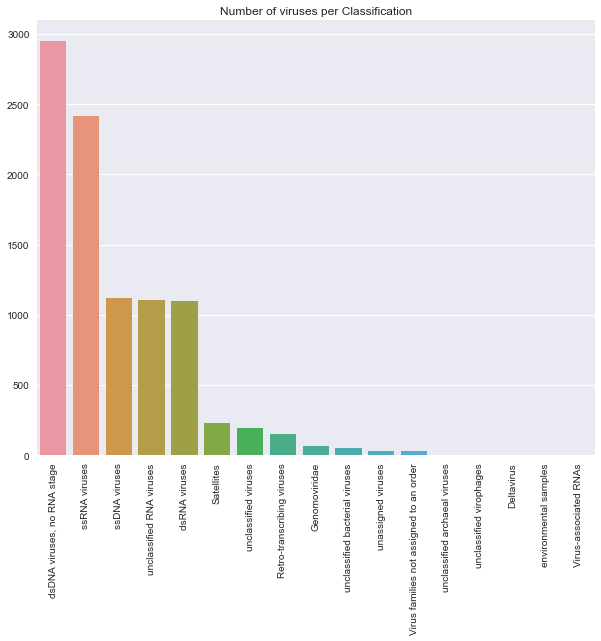

In [10]:
classifications = [item[0] for item in list(genomes['Classification'].value_counts().items())]
class_counts = [item[1] for item in list(genomes['Classification'].value_counts().items())]

plt.figure(figsize = (10,8))
virus_count_bar = sns.barplot(classifications, class_counts)
for item in virus_count_bar.get_xticklabels():
    item.set_rotation(90)
plt.title('Number of viruses per Classification')
None

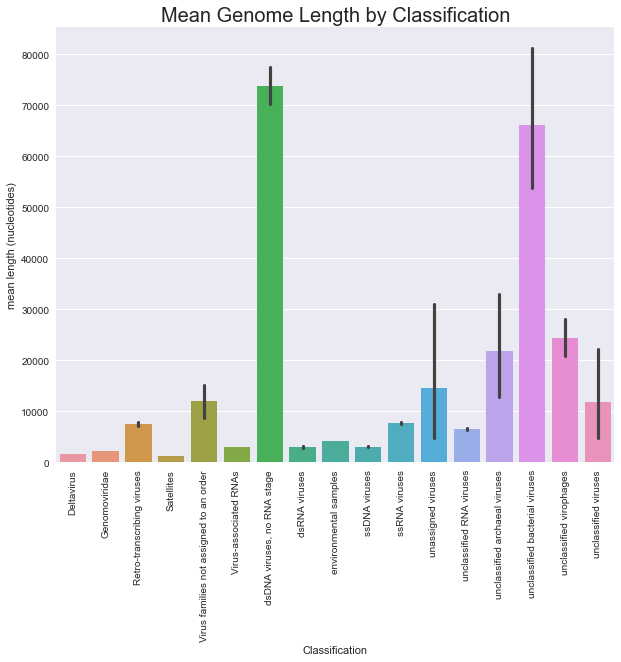

In [11]:
plt.figure(figsize = (10,8))
class_length_bar = sns.barplot(genomes['Classification'], genomes['Length'])
for item in class_length_bar.get_xticklabels():
    item.set_rotation(90)
plt.title('Mean Genome Length by Classification', fontsize=20)
plt.ylabel('mean length (nucleotides)')
None

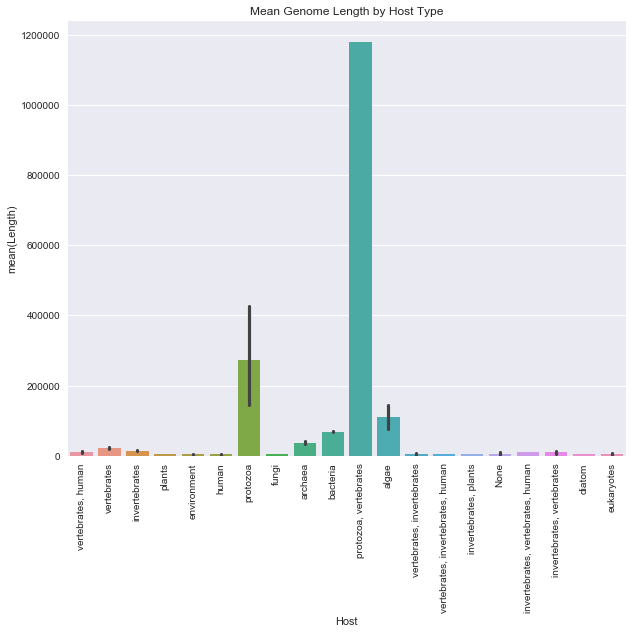

In [12]:
plt.figure(figsize = (10,8))
type_length_bar = sns.barplot(genomes['Host'], genomes['Length'])
for item in type_length_bar.get_xticklabels():
    item.set_rotation(90)
plt.title('Mean Genome Length by Host Type')
None

In [13]:
classifications

['dsDNA viruses, no RNA stage',
 'ssRNA viruses',
 'ssDNA viruses',
 'unclassified RNA viruses',
 'dsRNA viruses',
 'Satellites',
 'unclassified viruses',
 'Retro-transcribing viruses',
 'Genomoviridae',
 'unclassified bacterial viruses',
 'unassigned viruses',
 'Virus families not assigned to an order',
 'unclassified archaeal viruses',
 'unclassified virophages',
 'Deltavirus',
 'environmental samples',
 'Virus-associated RNAs']

Number per Phylogeny in unclassified RNA viruses 
 ['unclassified RNA viruses'] : [1105] 

Number per Phylogeny in unclassified viruses 
 ['unclassified viruses'] : [195] 

Number per Phylogeny in Retro-transcribing viruses 
 ['Retro'] : [151] 

Number per Phylogeny in unclassified archaeal viruses 
 ['unclassified archaeal viruses'] : [4] 

Number per Phylogeny in unclassified virophages 
 ['unclassified virophages'] : [4] 

Number per Phylogeny in Deltavirus 
 ['Deltavirus'] : [1] 

Number per Phylogeny in environmental samples 
 ['environmental samples'] : [1] 

Number per Phylogeny in Virus-associated RNAs 
 ['Virus'] : [1] 



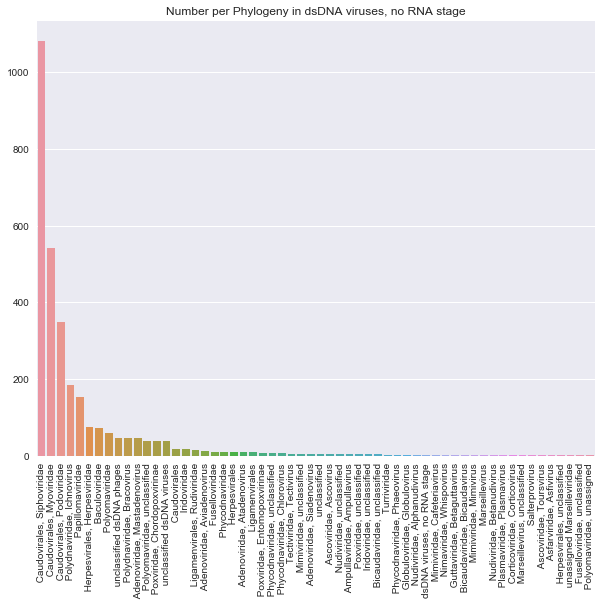

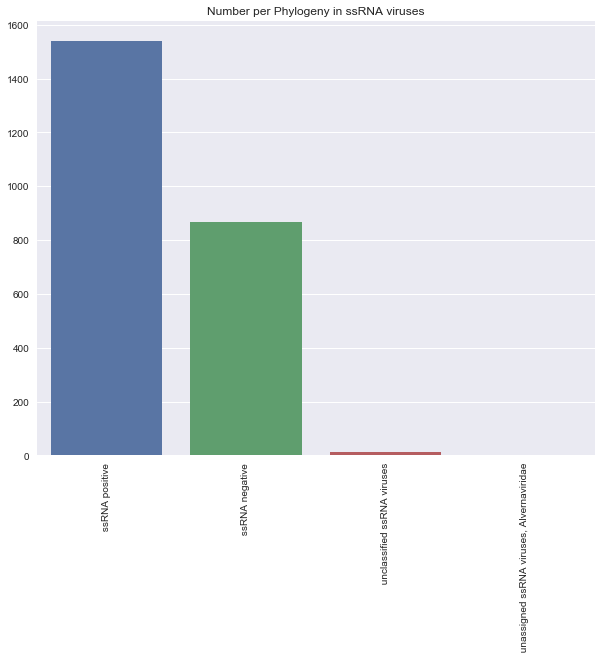

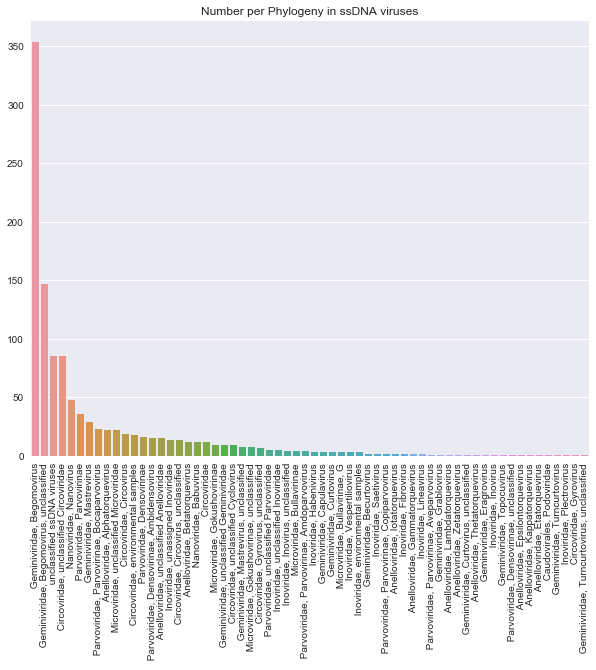

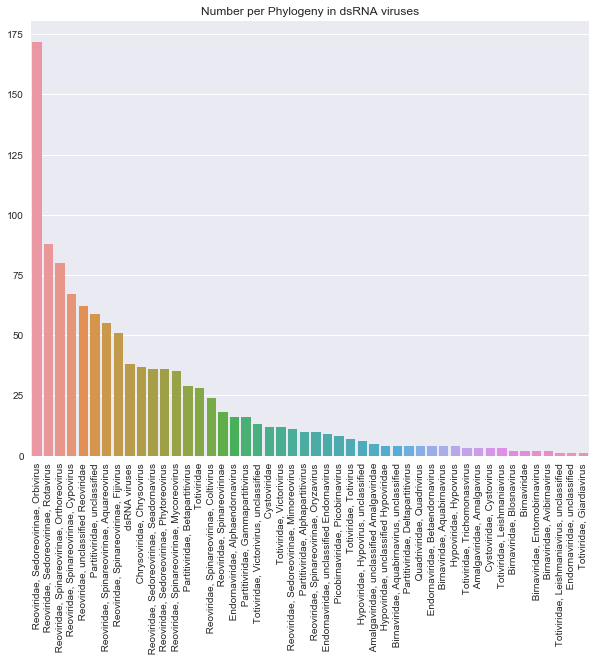

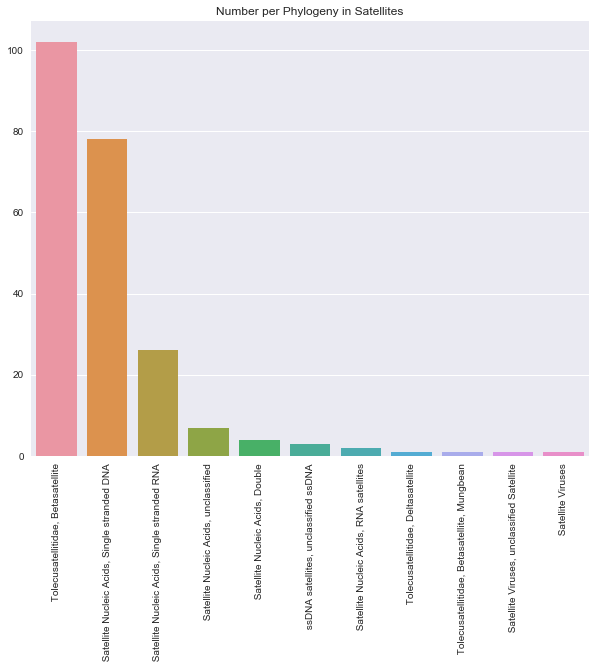

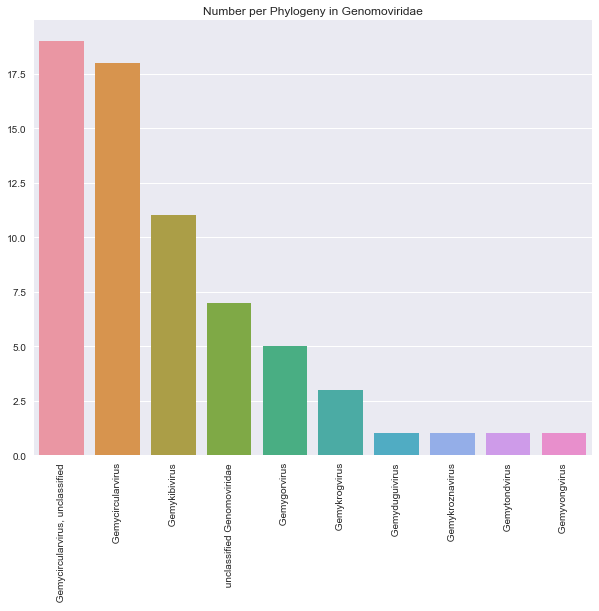

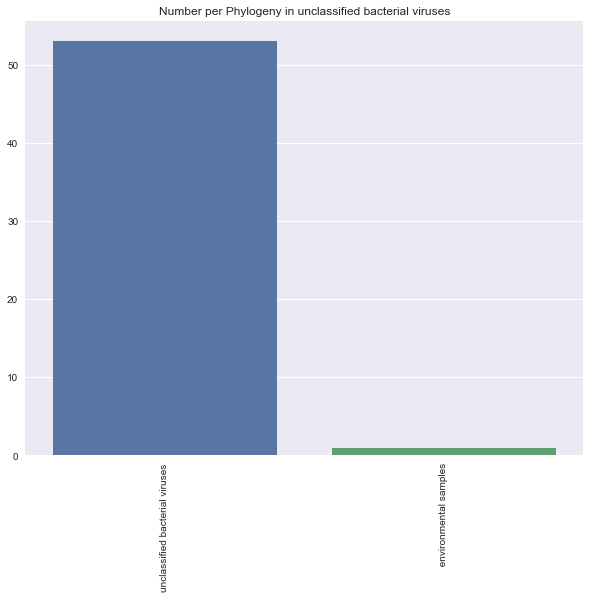

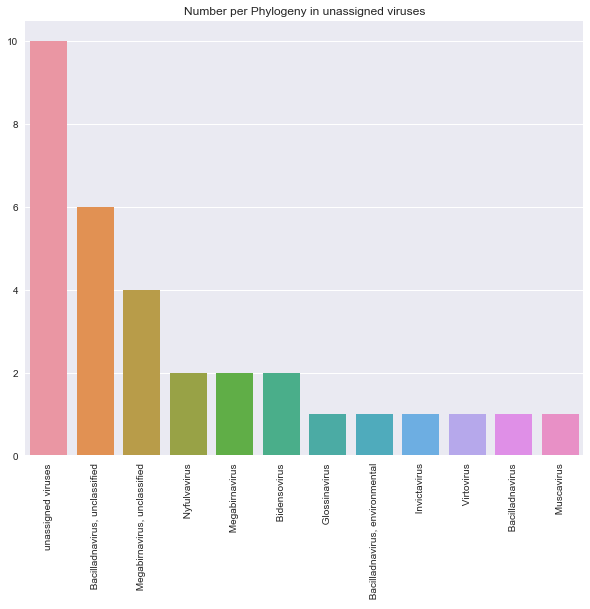

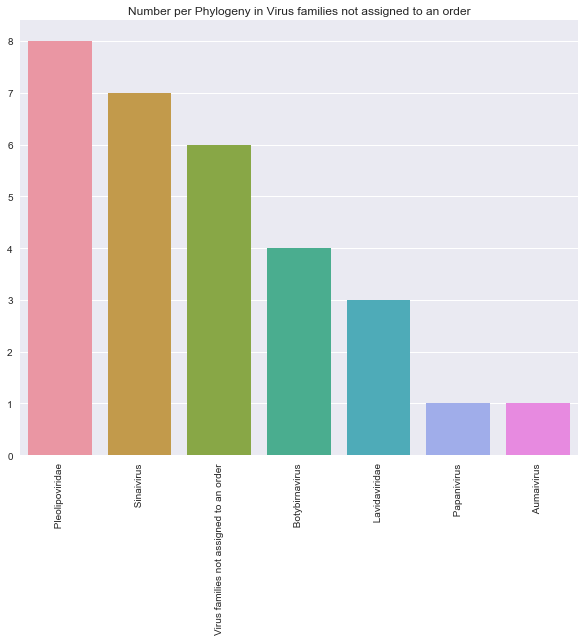

In [14]:
for classification in classifications:
    pd = genomes.loc[genomes['Classification'] == classification]
    phylogenies = [item[0] for item in list(pd['Phylogeny'].value_counts().items())]
    phylo_counts = [item[1] for item in list(pd['Phylogeny'].value_counts().items())]
    p_title = 'Number per Phylogeny in {}'.format(classification) 
    if len(phylogenies) > 1:
        plt.figure(figsize = (10,8))
        phylo_count_bar = sns.barplot(phylogenies, phylo_counts)
        for item in phylo_count_bar.get_xticklabels():
            item.set_rotation(90)
        plt.title(p_title)
        None
    else: 
        print(p_title, '\n', phylogenies,':', phylo_counts, '\n')